# Binary black hole detections

Matriculation: 2663452m

## Aims
The aims of this experiment are to procees the gravitational wave data from the first and second runs of the LIGO/Virgo gravitational wave detectors and to discover properties of the binary black hole systems that prodiced the signals.


Gravitational waves were first predicted by Einstien in his 1915 paper on General Relativity but in 2015 the first gravitational wave was detected by the LIGO research group.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import scipy.optimize as opt
import scipy.constants as const
import os
import lal as lal
from scipy.signal import spectrogram
import gw_detections_functions as gw
import pandas as pd


title_size = 16
axis_size = 12
plt.rcParams["font.family"] = "Times New Roman"


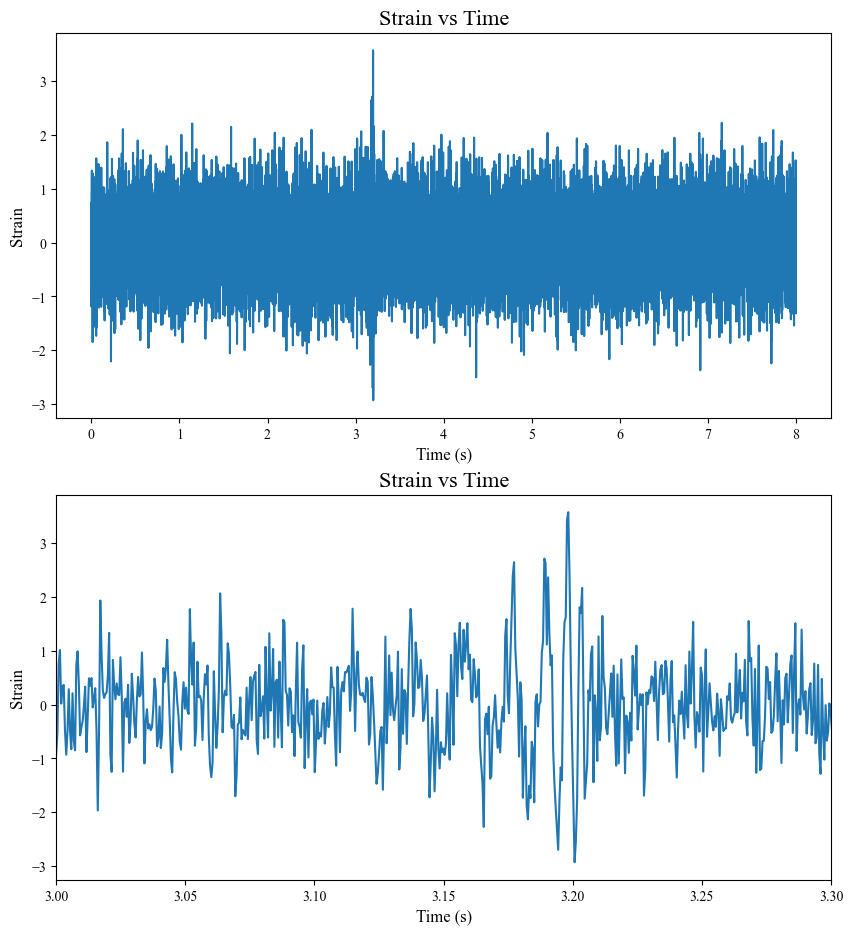

In [94]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]

plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)

plt.subplot(2,1,2)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.xlim(3,3.3)
plt.show()

The siganl shows a peak in the strain likely as the black holes collide releasing a lot of energy in a short amount of time.

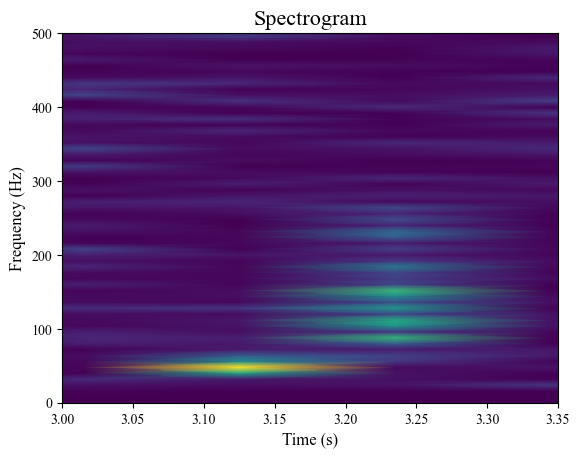

In [95]:
spec_f, spec_t, spec = sp.signal.spectrogram(strain, 2048)
plt.pcolormesh(spec_t, spec_f, spec, shading='gouraud')
plt.ylabel('Frequency (Hz)', fontsize=axis_size)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3,3.35)
plt.ylim(0,500)
plt.title('Spectrogram', fontsize=title_size)
plt.show()


reasonable mass of a black hole in merger 7 - 37 solar masses

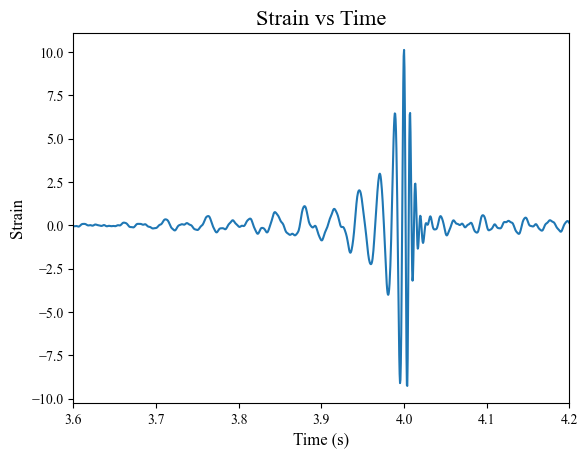

In [96]:
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(70,36,2048,8,inv_psd,400)

plt.figure()
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3.6,4.2)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()


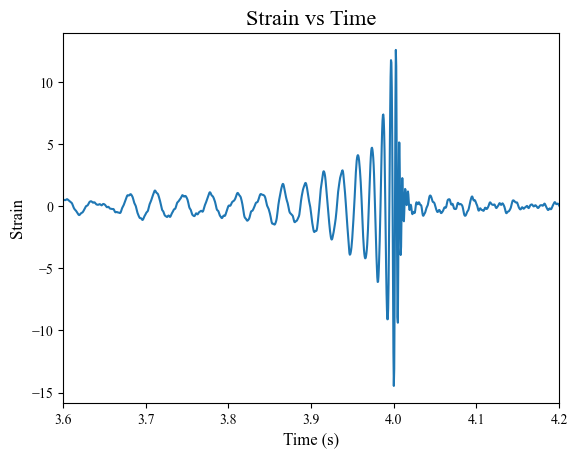

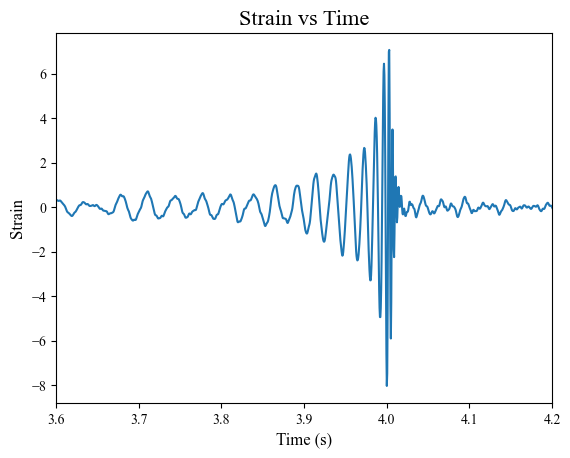

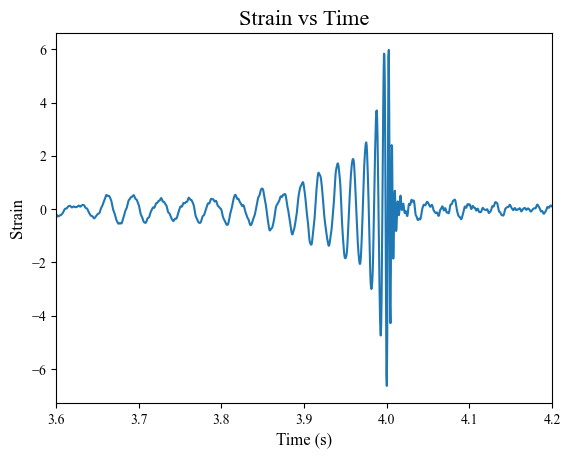

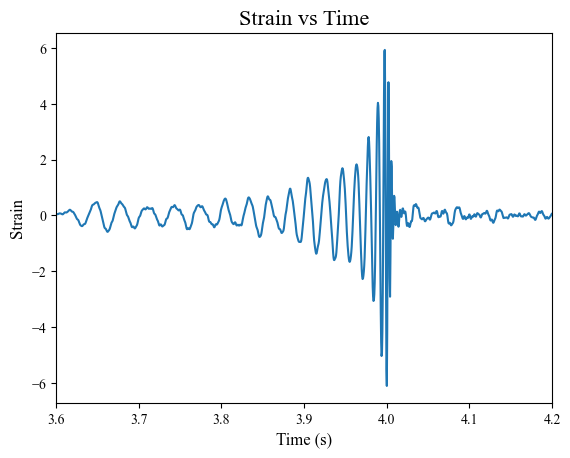

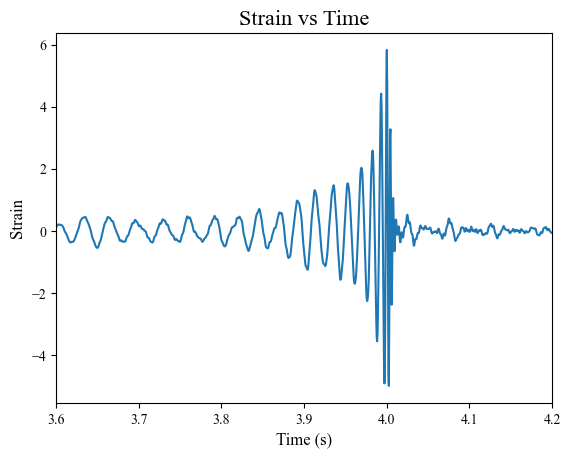

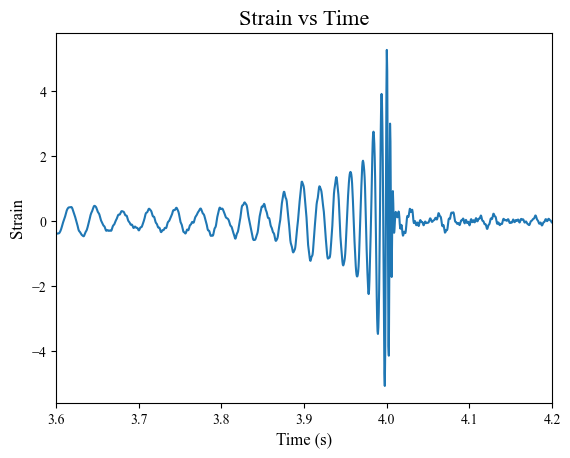

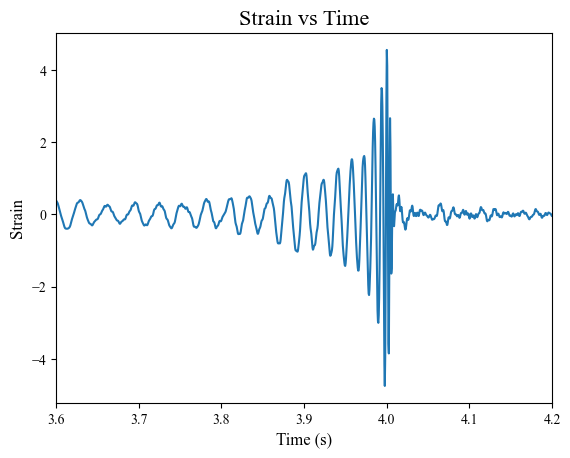

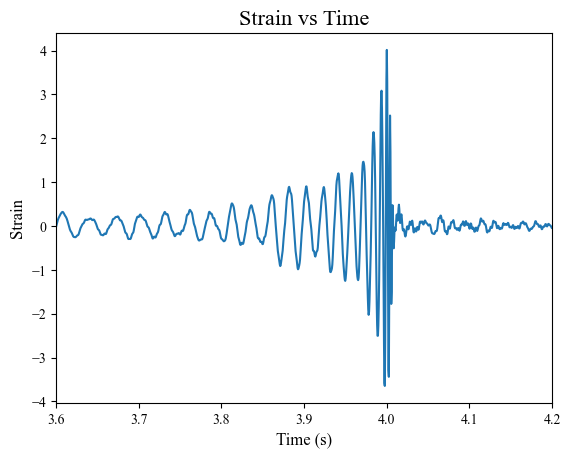

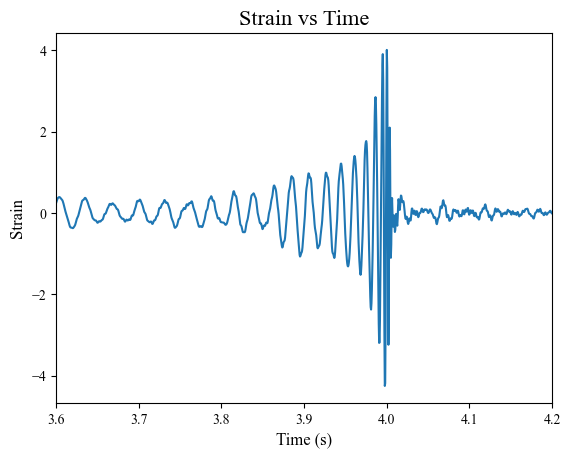

In [97]:
mass_one = [37,38,36,35,34,33,32,31,25]
mass_two = [24,23,22,21,20,19,18,17,24]
mass_three = np.array(mass_one) - 1
distance = [400,500,350,450,430,510,390,200,420]
distance = np.sort(np.array(distance))
for i in range(len(mass_one)):
        t, template = gw.make_template(mass_one[i],mass_two[i],2048,8,inv_psd,distance[i])
        plt.figure()
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(3.6,4.2)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()



# Task 2

As distance increases the amplitude of the wave decreases.
not much changes for masses that are simlar or different

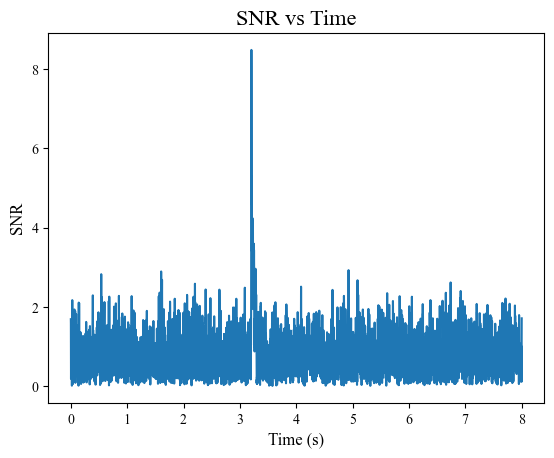

8.482283713317145
(array([6561]),)
[8.48228371] [3.20361328]


In [98]:
snr_ts = gw.get_snr(strain, template, 2048)
plt.figure()
plt.plot(time,snr_ts)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('SNR', fontsize=axis_size)
plt.title('SNR vs Time', fontsize=title_size)

plt.show()
print(np.max(snr_ts))
print(np.where(np.max(snr_ts) == snr_ts))
print(snr_ts[np.where(np.max(snr_ts) == snr_ts)],time[np.where(np.max(snr_ts) == snr_ts)])

min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05


### Part a

13.817943693057638 38.94736842105264 34.8421052631579


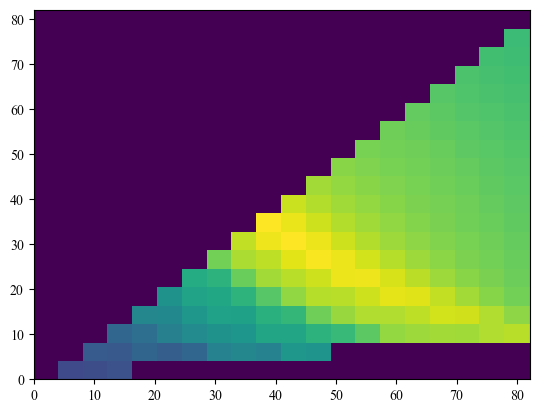

13.826971256612358 37.10526315789474 35.26315789473684


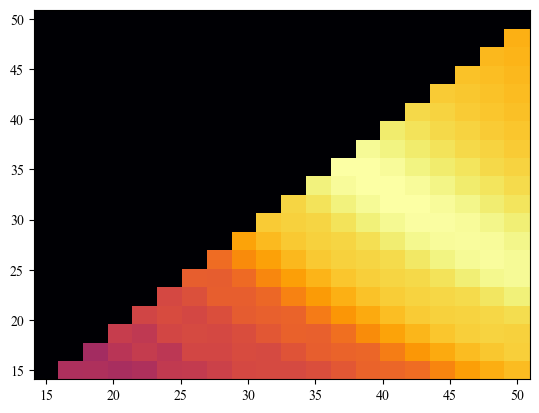

In [99]:
masses = np.linspace(2,80,20)
currentmax = 0
highest_snr = [[0 for x in range(13)] for y in range(13)]
mass1 = [] 
mass2 = [] 
allsnr = []

for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr.append(0)
print(currentmax, M1, M2)

reshaped = (np.reshape(allsnr, (20,20)).T)
plt.figure()
plt.pcolor(masses, masses, reshaped)
plt.show()

allsnr2 = []
currentmax = 0
masses2 = np.linspace(15,50,20)
maxsnr = []
for m1 in masses2:
    for m2 in masses2:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr2.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr2.append(0)
print(currentmax, M1, M2)



reshaped = (np.reshape(allsnr2, (20,20)).T)
plt.figure()
plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
plt.show()

Best fit mass pair for snr result is 36,35 solar masses

### Part b

(3.0, 3.3)

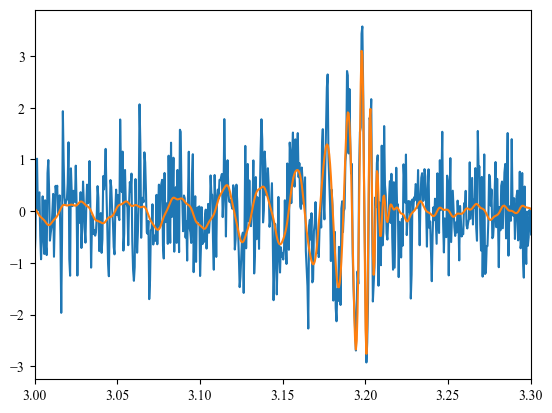

In [100]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(36.8,35.5,2048,8,inv_psd,d=1144,tc=3.1978,phic=0)
plt.plot(time, strain)
plt.plot(t, template)
plt.xlim(3,3.3)

[[3.19824219]]


/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_91564/1711584164.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_91564/1711584164.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)


The best fit parameters for distance, time, and phase are 1151.1513129536315, 3.1977281585687707, and 5.69828940481586e-16 respectively.


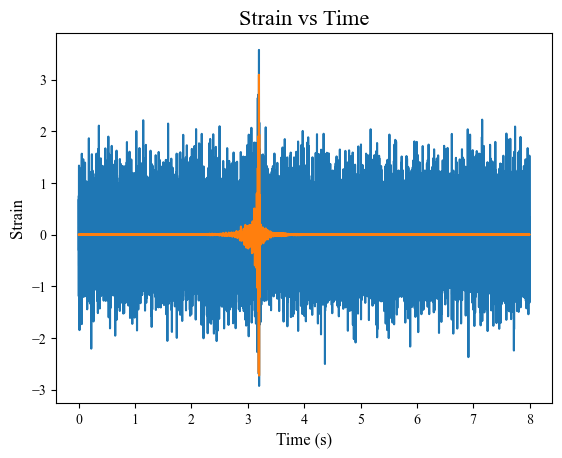

In [101]:
mass1 = M1
mass2 = M2
m1 = M1
m2 = M2

#generating the template using these masses
t, template = gw.make_template(m1,m2,2048,8,inv_psd)

#generating the snr timeseries
snr_ts = gw.get_snr(strain,template,2048)

def make_signal(t,d,tc,phic):
    _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    return signal
t = 8
# distances = np.array(np.linspace(100,10000,10000))
tc_min = min_time
tc_max = max_time
print(time[(np.where(np.max(snr_ts) == snr_ts),)])
phic_min = 0
phic_max = 2*np.pi
d_min = 0
d_max = 10000
#p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]
p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])

ht_err = np.array(np.ones(strain.size))
b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)

t, template = gw.make_template(m1,m2,2048,8,inv_psd,d = popt[0],tc = popt[1],phic = popt[2])

print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
plt.figure()
plt.plot(time, strain)
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()

# m1 = M1
# m2 = M2

# #generating the template using these masses
# t, template = gw.make_template(m1,m2,2048,8,inv_psd)

# #generating the snr timeseries
# snr_ts = gw.get_snr(strain,template,2048)

# # without above get wrong answer

# d_est = 1000 # Mpc
# tc_est = time[np.argmax(np.absolute(snr_ts))] # tc estimate at peak of snr timeseries
# phic_est = 0.5 # radians

# p0 = [d_est, tc_est, phic_est]

# # bounds on the fitting parameters
# d_min, d_max = [0, 10000]
# tc_min, tc_max = [tc_est-0.05, tc_est+0.05]
# phic_min, phic_max = [0,2*np.pi]

# ht_err = np.ones(strain.size)
# b = [[d_min,tc_min,phic_min,],[d_max,tc_max,phic_max]]
# popt, pcov = curve_fit(make_signal,time,strain,p0,bounds=b,sigma=ht_err,absolute_sigma=True)

# dist, timeco, phico = popt # fitted distance, time of coalescence and phase of coalescence parametes

# d_err, tc_err, phic_err = np.sqrt(np.diag(pcov)) # errors on these values

# print(f'Distance: {dist:0.2f} \u00B1 {d_err:0.2f}Mpc')
# print(f'Time of Coalescence:: {timeco:0.4f} \u00B1 {tc_err:0.4f}s')
# print(f'Phase at Coalescence:: {phico:0.1f} \u00B1 {phic_err:0.1f}1')

('GW150914', 'GW170823', 'GW170814', 'GW170104', 'GW151226', 'GW151012', 'GW170729', 'GW170809', 'GW170818')
------------------------------------------------------------
GW150914_strain.txt
GW150914_strain.txt


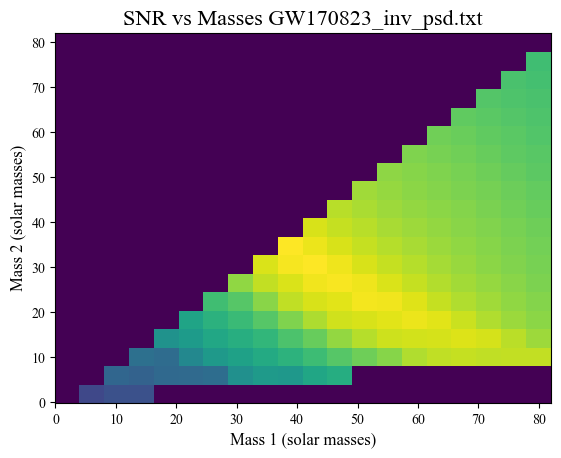

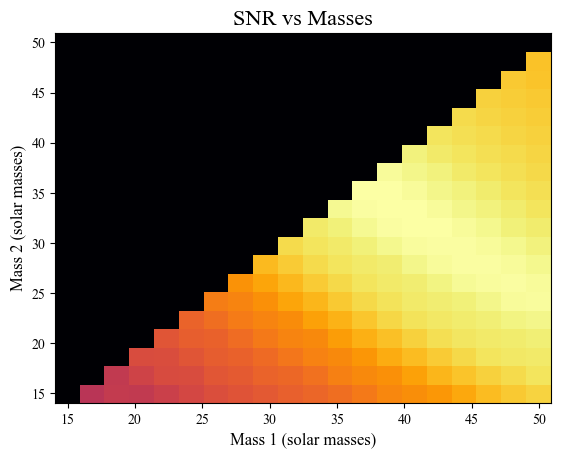

The best fit masses for GW170823_inv_psd.txt are 37.10526315789474 and 35.26315789473684 respectively.
[[3.19824219]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


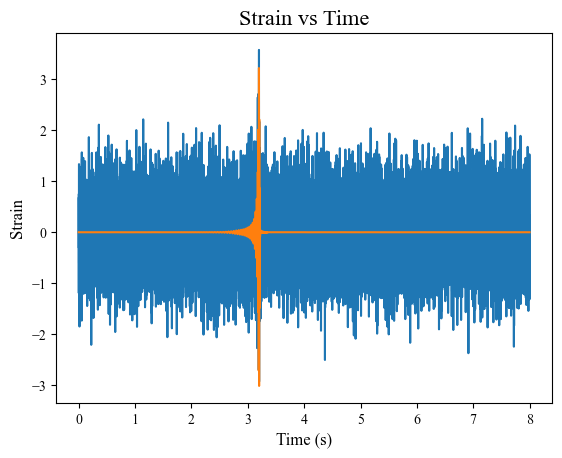

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 1151.1018475834662, 3.1977281582112775, and 5.627592567994544e-13 respectively.
------------------------------------------------------------
GW151012_strain.txt
GW151012_strain.txt


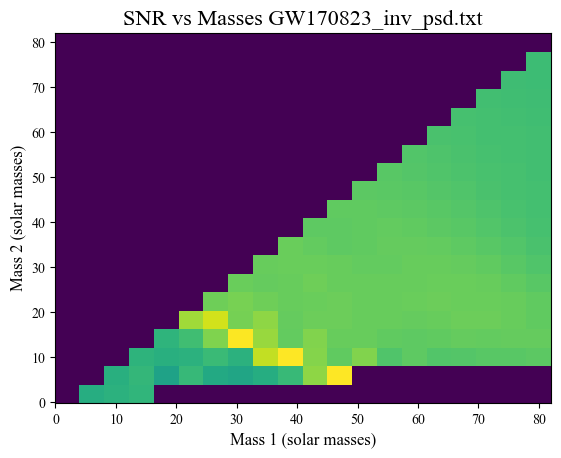

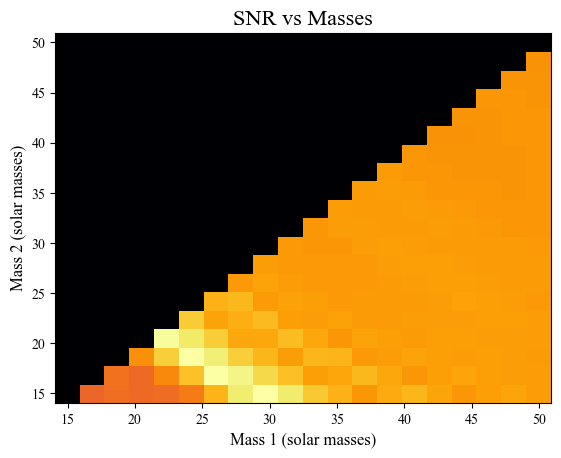

The best fit masses for GW170823_inv_psd.txt are 29.736842105263158 and 15.0 respectively.
[[2.70800781]]


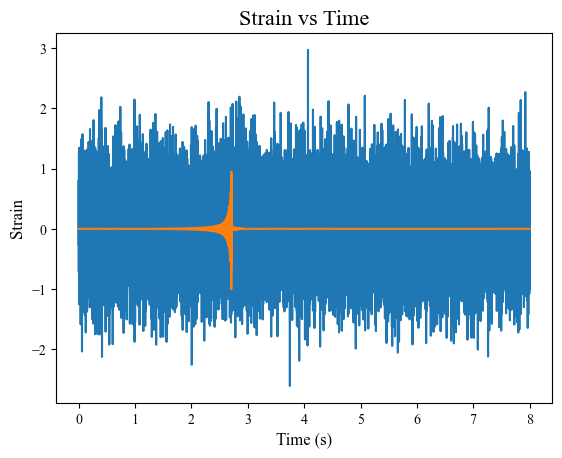

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 1988.4938499956252, 2.7077798832151734, and 3.95817145268265e-11 respectively.
------------------------------------------------------------
GW151226_strain.txt
GW151226_strain.txt


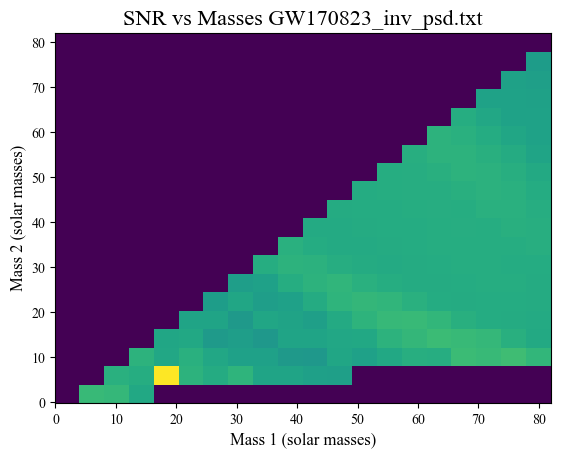

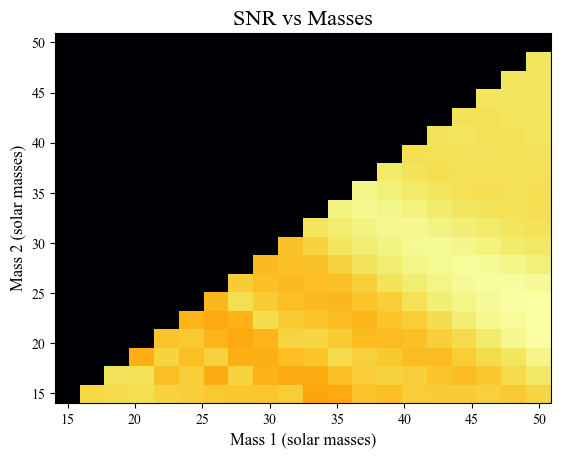

The best fit masses for GW170823_inv_psd.txt are 50.0 and 24.210526315789473 respectively.
[[5.97949219]]


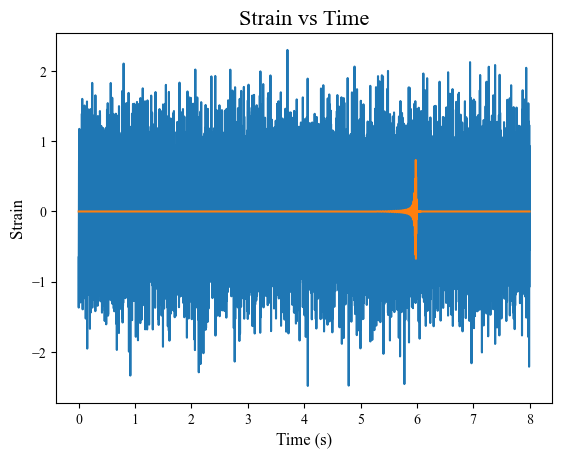

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4446.812123220938, 5.9792792556056735, and 0.7011994498179687 respectively.
------------------------------------------------------------
GW170104_strain.txt
GW170104_strain.txt


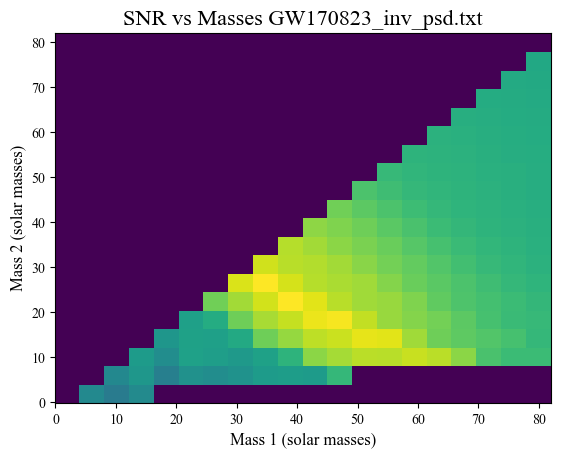

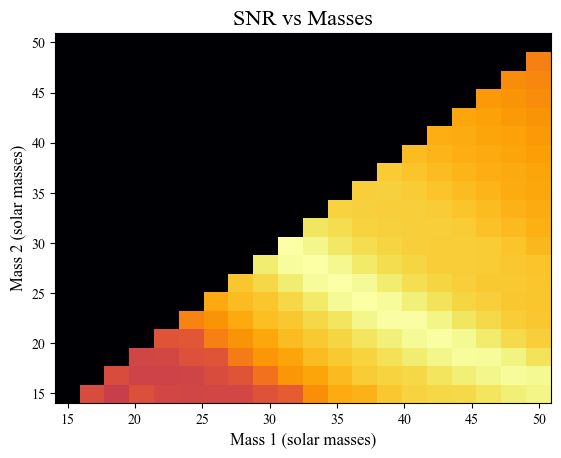

The best fit masses for GW170823_inv_psd.txt are 35.26315789473684 and 26.05263157894737 respectively.
[[1.97460938]]


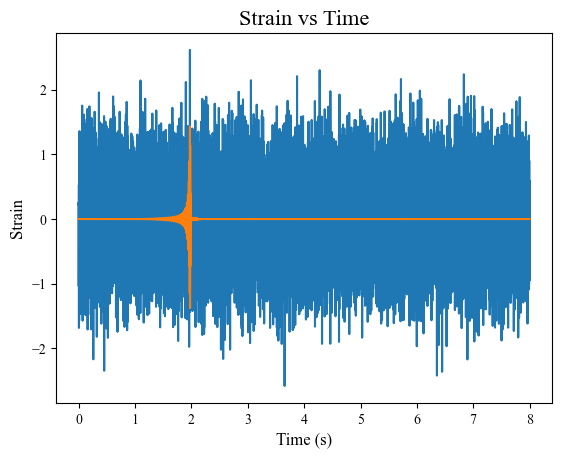

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 2136.0479558868856, 1.9745279148320647, and 1.4337826312630535 respectively.
------------------------------------------------------------
GW170608_strain.txt
GW170608_strain.txt


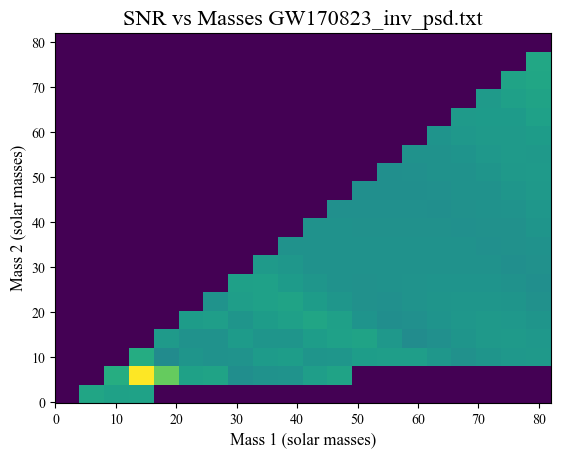

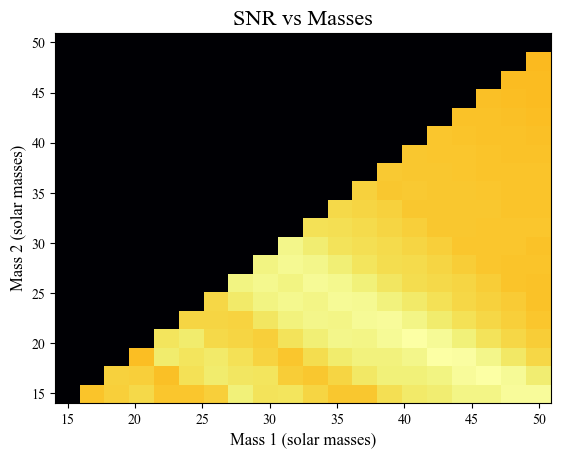

The best fit masses for GW170823_inv_psd.txt are 46.315789473684205 and 16.842105263157894 respectively.
[[7.04345703]]


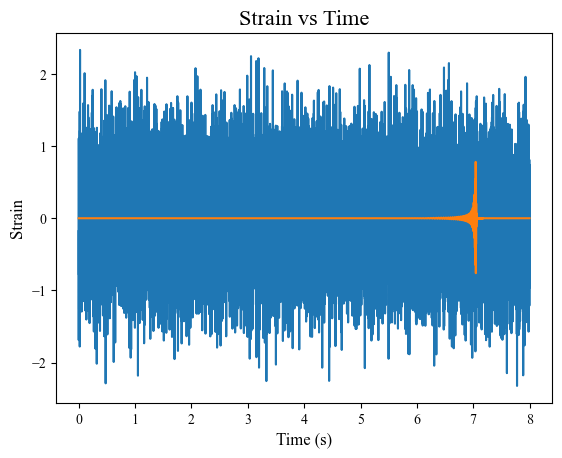

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 3127.1959632560615, 7.042901379805088, and 1.727291206556948e-14 respectively.
------------------------------------------------------------
GW170729_strain.txt
GW170729_strain.txt


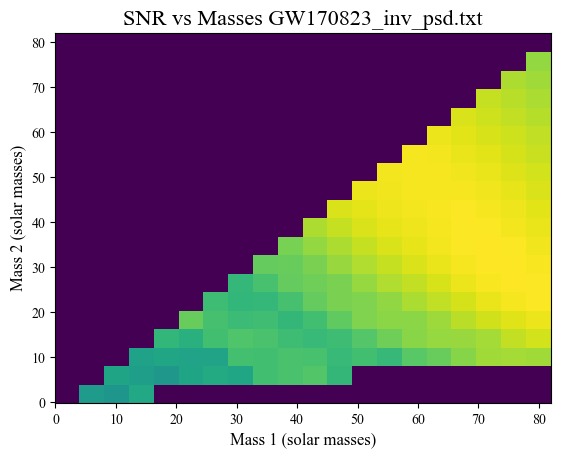

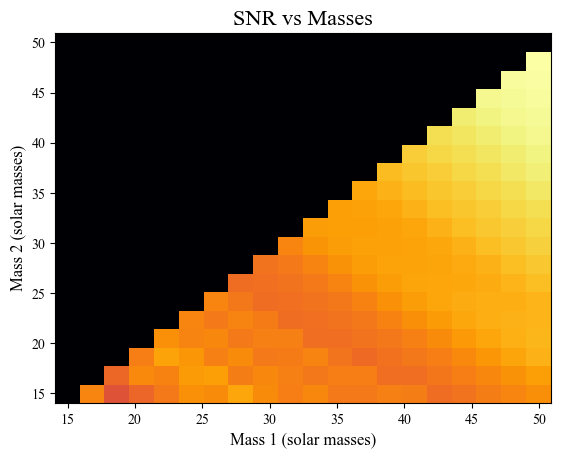

The best fit masses for GW170823_inv_psd.txt are 50.0 and 48.1578947368421 respectively.
[[3.54003906]]


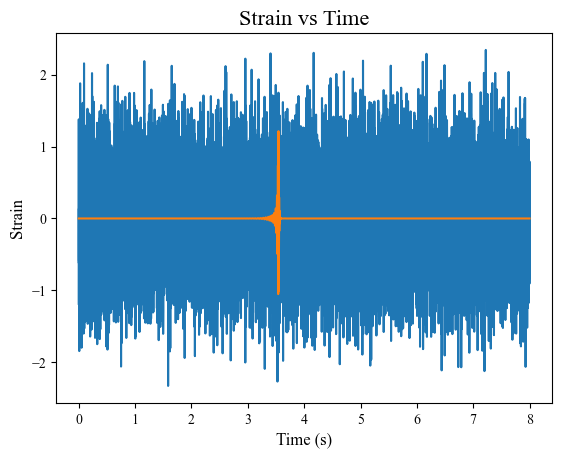

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 3875.266387042161, 3.540056981581861, and 2.681343669943448 respectively.
------------------------------------------------------------
GW170809_strain.txt
GW170809_strain.txt


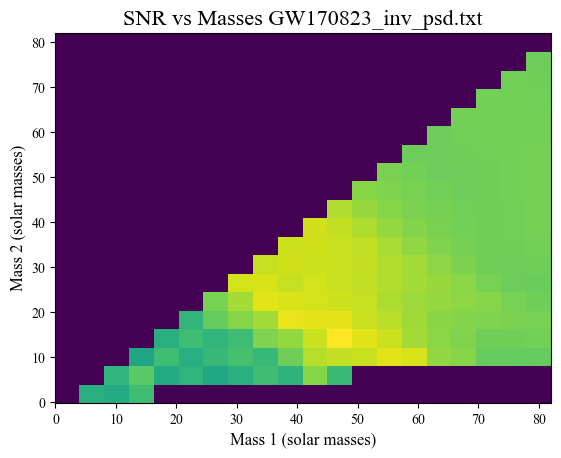

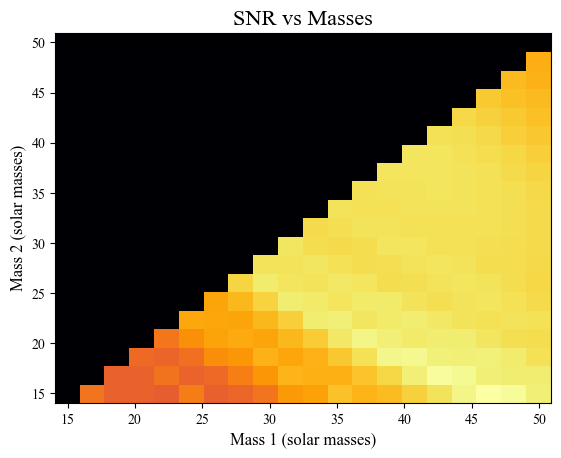

The best fit masses for GW170823_inv_psd.txt are 46.315789473684205 and 15.0 respectively.
[[2.640625]]


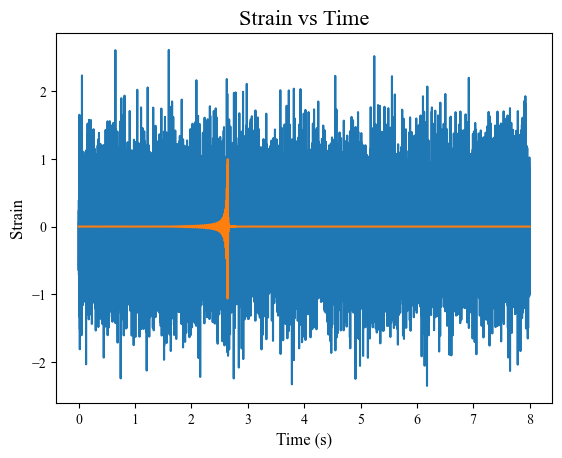

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 2136.0598865815737, 2.640678127191292, and 3.216013497908596 respectively.
------------------------------------------------------------
GW170814_strain.txt
GW170814_strain.txt


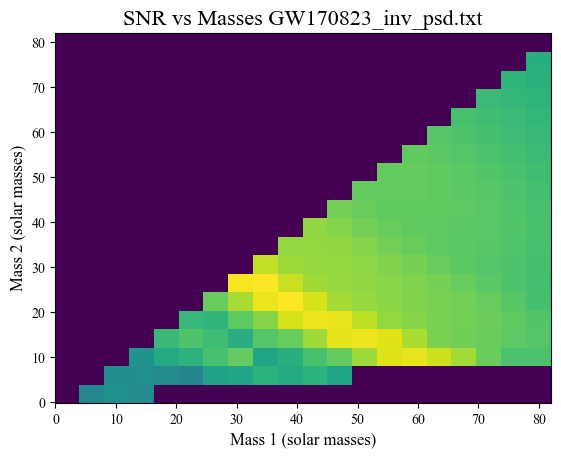

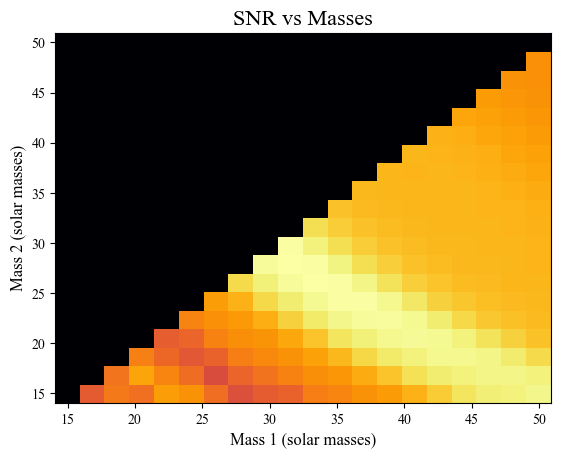

The best fit masses for GW170823_inv_psd.txt are 31.57894736842105 and 27.894736842105264 respectively.
[[3.33691406]]


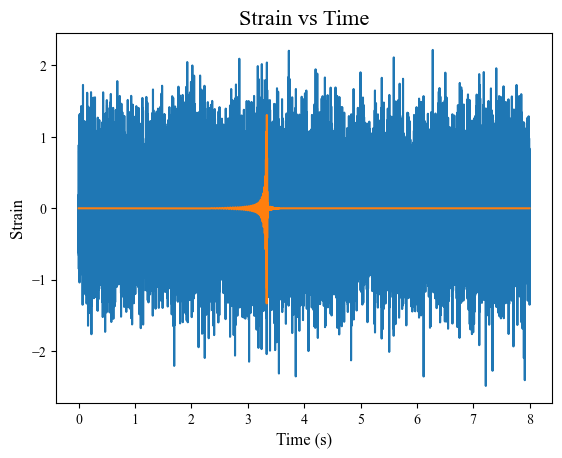

The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 2227.3163051832935, 3.3370779092817133, and 0.5982025639277905 respectively.
------------------------------------------------------------
GW170817_strain.txt
------------------------------------------------------------
GW170818_strain.txt
GW170818_strain.txt


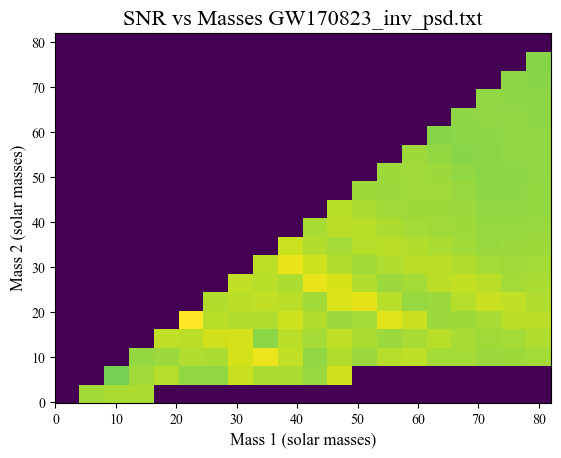

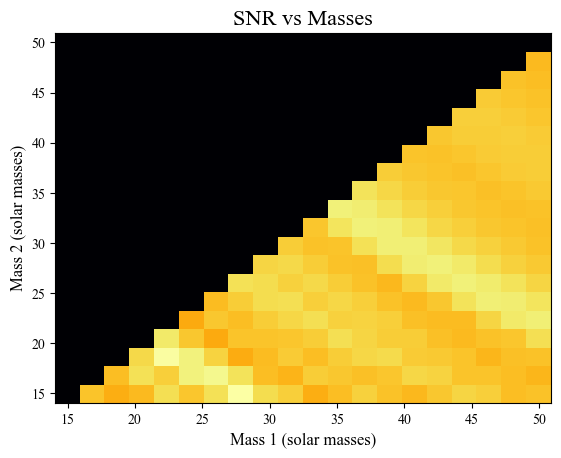

The best fit masses for GW170823_inv_psd.txt are 27.894736842105264 and 15.0 respectively.
[[7.94042969]]


ValueError: `x0` is infeasible.

In [109]:
path = 'strain_data/'
files = np.sort(os.listdir(path))

distance_coel = [] 
time_coel = []
phase_coel = [] 
larger_masses = []
smaller_masses = []
names = []
name = ('GW150914', 'GW170823', 'GW170814', 'GW170104', 'GW151226', 'GW151012', 
'GW170729', 'GW170809', 'GW170818')

print(name)
for file in files:
    filename = path+file
    print('------------------------------------------------------------')
    print(file)
    if file.startswith('GW170817'):
        pass
    else:

        if file.endswith('strain.txt'):
            data = np.loadtxt(filename)
            time = data[:,0]
            strain = data[:,1]
            names.append(file)
        print(file)  
        for file in os.listdir('inv_psd/'):
            if file.endswith('inv_psd.txt'):
                inv_psd_data = np.loadtxt('inv_psd/'+ file)
                inv_psd2 = inv_psd_data[:,1]

        t, template = gw.make_template(37,36,2048,8,inv_psd2,400)
        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05

        masses = np.linspace(2,80,20)
        currentmax = 0
        highest_snr = [[0 for x in range(13)] for y in range(13)]
        mass1 = [] 
        mass2 = [] 
        allsnr = []

        for m1 in masses:
            for m2 in masses:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2

                else:
                    allsnr.append(0)
        reshaped = (np.reshape(allsnr, (20,20)).T)

        plt.figure()
        plt.title(f'SNR vs Masses {file}', fontsize=title_size)
        plt.xlabel('Mass 1 (solar masses)', fontsize=axis_size)
        plt.ylabel('Mass 2 (solar masses)', fontsize=axis_size)
        plt.pcolor(masses, masses, reshaped)
        plt.show()

        allsnr2 = []
        currentmax = 0
        masses2 = np.linspace(15,50,20)
        maxsnr = []
        for m1 in masses2:
            for m2 in masses2:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2,400)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr2.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2
                else:
                    allsnr2.append(0)

        reshaped = (np.reshape(allsnr2, (20,20)).T)
        plt.figure()
        plt.title('SNR vs Masses', fontsize=title_size)
        plt.xlabel('Mass 1 (solar masses)', fontsize=axis_size)
        plt.ylabel('Mass 2 (solar masses)', fontsize=axis_size)
        plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
        plt.show()
        
        mass1 = M1
        mass2 = M2
        m1 = M1
        m2 = M2
        t, template = gw.make_template(m1,m2,2048,8,inv_psd)

        #generating the snr timeseries
        snr_ts = gw.get_snr(strain,template,2048)

        def make_signal(t,d,tc,phic):
            _,signal = gw.make_template(M1,M2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
            return signal
        t = 8
        distances = np.array(np.linspace(100,10000,10000))
        tc_min = min_time
        tc_max = max_time
        phic_min = 0
        phic_max = 2*np.pi
        d_min = 100
        d_max = 4500
        
        print(f'The best fit masses for {file} are {M1} and {M2} respectively.')
        print(time[(np.where(np.max(snr_ts) == snr_ts),)])
        ht_err = np.array(np.ones(strain.size))
        b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
        popt, pcov = curve_fit(make_signal,time ,strain, p0 = [1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5],bounds = b, sigma=ht_err, absolute_sigma=True)

        distance_coel.append(popt[0])
        time_coel.append(popt[1])
        phase_coel.append(popt[2])
        larger_masses.append(M1)
        smaller_masses.append(M2)

        t, template = gw.make_template(m1,m2,2048,8,inv_psd2,d = popt[0],tc = popt[1],phic = popt[2])

        plt.figure()
        plt.plot(time, strain)
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()
        print(f'The best fit parameters for data set {file} for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
        # print(currentmax, M1, M2)


In [110]:
df = pd.DataFrame({'file':name,'Distance (Mpc)':distance_coel, 'Time (s)':time_coel, 'Phase (radians)':phase_coel, 'Larger Mass (solar masses)':larger_masses, 'Smaller Mass (solar masses)':smaller_masses})
df.to_csv('coel_data.csv')
df

ValueError: All arrays must be of the same length

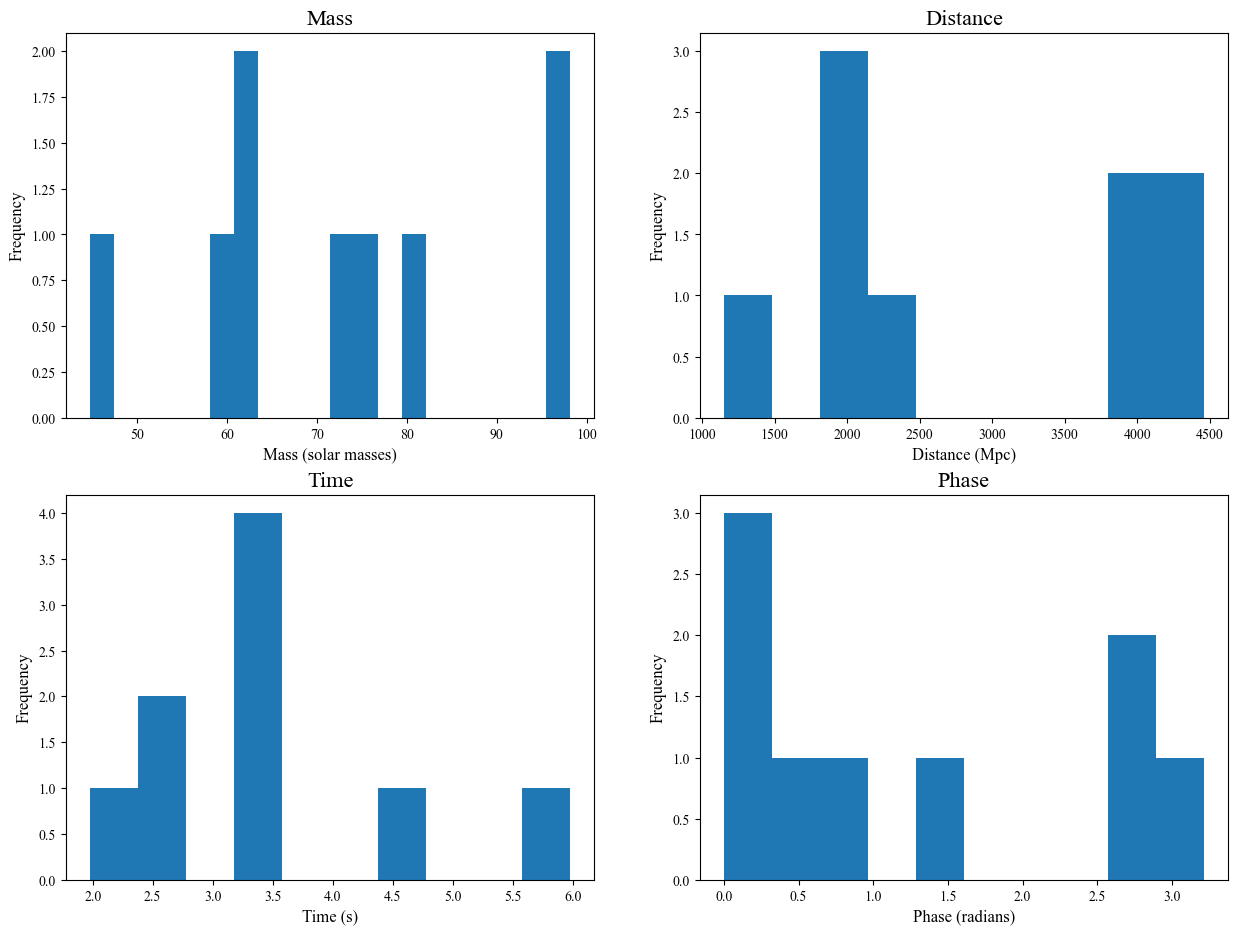

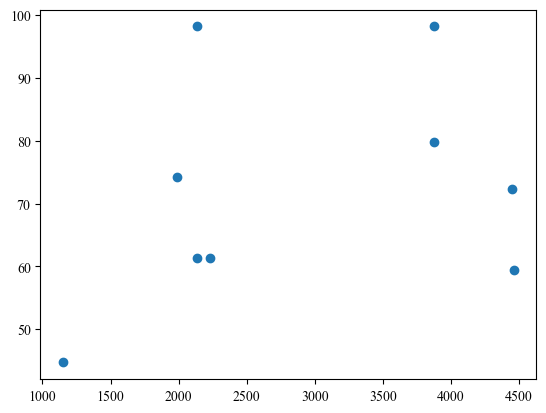

['GW150914_strain.txt', 'GW170823_strain.txt', 'GW170814_strain.txt', 'GW170104_strain.txt', 'GW151226_strain.txt', 'GW151012_strain.txt', 'GW170729_strain.txt', 'GW170809_strain.txt', 'GW170818_strain.txt']


In [ ]:
all_masses = np.array(larger_masses) + np.array(smaller_masses)
all_masses = np.sort(all_masses)

plt.figure(figsize = (15,11))
plt.subplot(2,2,1)
plt.hist(all_masses, bins=20)
plt.xlabel('Mass (solar masses)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Mass', fontsize=title_size)

plt.subplot(2,2,3)
plt.hist(time_coel, bins=10)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Time', fontsize=title_size)

plt.subplot(2,2,2)
plt.hist(distance_coel, bins=10)
plt.xlabel('Distance (Mpc)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Distance', fontsize=title_size)

plt.subplot(2,2,4)
plt.hist(phase_coel, bins=10)
plt.xlabel('Phase (radians)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Phase', fontsize=title_size)
plt.show()

plt.figure()
plt.scatter(distance_coel, all_masses)
plt.show()

print(names)

In [112]:
print(distance_coel)

[1151.1018475834662, 1988.4938499956252, 4446.812123220938, 2136.0479558868856, 3127.1959632560615, 3875.266387042161, 2136.0598865815737, 2227.3163051832935]


In [ ]:
      
    # data = np.loadtxt('data_files/GW150914_strain.txt')
    # time = data[:,0]
    # strain = data[:,1]


    # inv_psd = np.loadtxt('data_files/GW150914_inv_psd.txt',usecols=(1,))
    # t, template = gw.make_template(37,36,2048,8,inv_psd,400)



    # snr_ts = gw.get_snr(strain, template, 2048)
    # min_time = time[np.where(np.max(snr_ts) == snr_ts)]-1
    # max_time = time[np.where(np.max(snr_ts) == snr_ts)]+1



    # masses = np.linspace(2,80,50)
    # currentmax = 0
    # highest_snr = [[0 for x in range(13)] for y in range(13)]
    # mass1 = [] 
    # mass2 = [] 
    # allsnr = []

    # for m1 in masses:
    #     for m2 in masses:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr.append(0)
    # print(currentmax, M1, M2)

    # reshaped = (np.reshape(allsnr, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses, masses, reshaped)
    # plt.show()

    # allsnr2 = []
    # currentmax = 0
    # masses2 = np.linspace(15,50,50)
    # maxsnr = []
    # for m1 in masses2:
    #     for m2 in masses2:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr2.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr2.append(0)
    # print(currentmax, M1, M2)



    # reshaped = (np.reshape(allsnr2, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
    # plt.show()


    # mass1 = M1
    # mass2 = M2
    # def make_signal(t,d,tc,phic):
    #     _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    #     return signal
    # t = 8
    # distances = np.array(np.linspace(100,10000,10000))
    # tc_min = min_time
    # tc_max = max_time
    # phic_min = 0
    # phic_max = 2*np.pi
    # d_min = 100
    # d_max = 2000
    # #p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]


    # ht_err = np.array(np.ones(strain.size))
    # b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
    # popt, pcov = curve_fit(make_signal,time ,strain, p0 = [890,time[(np.where(np.max(snr_ts) == snr_ts),)],5],bounds = b, sigma=ht_err, absolute_sigma=True)

    # t, template = gw.make_template(mass1,mass2,2048,8,inv_psd,popt[0],popt[1],popt[2])

    # print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
    # plt.figure()
    # plt.plot(time, strain)
    # plt.plot(time, template)
    # plt.xlabel('Time (s)', fontsize=axis_size)
    # plt.ylabel('Strain', fontsize=axis_size)
    # plt.title('Strain vs Time', fontsize=title_size)
    # #plt.xlim(2.9,3.4)
    # plt.show()

# Task 2 part a brute force method


In [ ]:
masses = np.linspace(2,80,13)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    final_mass1
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])

masses = np.linspace(15,70,20)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    #print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    


masses = np.linspace(33,40,200)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])


In [ ]:
# for m1 in mass1:
#     for m2 in mass2:
#           if m1>m2 and (m1/m2) < 8:
#             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
#             snr_ts = gw.get_snr(strain, template, 2048)
#             highest_snr.append(np.max(snr_ts))
#             mass1_2.append(m1)
#             mass2_2.append(m2)
